<a href="https://colab.research.google.com/github/YoshifumiMiyagi/RSV_analysis/blob/main/RSV(1y%3E)_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
SEED=42

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_validate

In [3]:
excel_file = '/content/drive/MyDrive/BD IRA.xlsx'

df1 = pd.read_excel(excel_file, sheet_name='BD')
Df1 = df1[df1['Patient with a diagnosed chronic condition']=='No']
Df1 = df1[df1['Age (months)'] >= 12]
Df1.shape

(538, 91)

In [4]:
select = ['Age (months)', 'Gender ',
       'Medical insurance', 'Length of stay (Days)',
       'Meets criteria for clinical pneumonia',

       'Health history : Prior admission because of respiratory condition',
       'Health history : Prematurity                      ', 'Breastfeeding',
       'Age-appropriate vaccinations', 'Number of Hib vaccine doses received',
       'Number of pneumococcal vaccine doses received',
       'Number of antirotavirus vaccine doses received',

       'Previous history of antibiotic use in the 2 weeks leading up to the admission',
       'If yes. which antibiotics', 'If yes. who prescribed the antibiotics',
       'Diagnosis at admission', 'Known asthmatic patient',
       'Patient with a diagnosed chronic condition',
       'Duration of pain  before consultation (days)', 'History of fever',
       'Number of days with fever', 'History of vomiting',
       'Number of days of vomiting', 'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',
       'Unusual sleepiness', 'Oxygen saturation (SaO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',
       'Paleness', 'Disorders of consciousness', 'Dehydration signs',
       'Confirmation of dehydration', 'Restlessness ', 'Cyanosis',
       'Nasal flaring', 'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       'Hypoventilation', 'Nasopharyngeal aspiration', 'Labored breathing',
       'Wood Downes score', 'Score interpretation', 'Blood sugar level',
       'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
       'C-reactive protein', 'Procalcitonin', 'Oxygen Therapy',
       'Bronchodilators', 'Corticosteroid',
       'Antibiotherapy during hospitalization', 'Cloxacillin', 'Gentamicin',
       'Ampicillin', 'Cephalosporin', 'Amoxicillin/Clavulanic acid',
       'Chloramphenicol', 'Patient transferred to intensive care unit',
       'Length of stay in intensive care unit', 'Chest X-ray finding',
       'Pleural effusion', 'Location of pleural effusion', 'Main diagnostic ',
       'Clinical progression',
       'Blood culture results ',

       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                                      Allele  1',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                                        Allele  2',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                              Allele  3',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                               Allele  4',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                             Allele  5']

DF1 = Df1[select]

In [5]:
mapping = {

    ' Rhinovirus': 'Rhino',
    ' CoronavirusesNL63': 'Corona',
    ' RSV-B': 'RSV',
    ' Adenovirus': 'Adeno',
    'Parainfluenza viruses 2': 'Parainfluenza',
    ' RSV-A': 'RSV',
    'Parainfluenza viruses 4': 'Parainfluenza',
    ' CoronavirusesOC43': 'Corona',
    'RSV-A': 'RSV',
    'Bordetella pertussis': 'Others',
    'Mycoplasma pneumonia': 'Others',
    ' Influenza A': 'Flu',
    'Parainfluenza viruses 1': 'Parainfluenza',
    ' Influenza B': 'Flu',
    'Parainfluenza viruses 3': 'Parainfluenza',
    'Human metapneumovirus': 'HMPV',
    'Rhinovirus': 'Rhino',
    'Adenovirus': 'Adeno',
    'Influenza A': 'Flu',
    ' N/A': 'Others',
    'N/A': 'Others'
}

# マッピング
DF1['Group1'] = Df1.iloc[:,-5].map(mapping).fillna('Others')
DF1['Group2'] = Df1.iloc[:,-4].map(mapping).fillna('Others')
DF1['Group3'] = Df1.iloc[:,-3].map(mapping).fillna('Others')
DF1['Group4'] = Df1.iloc[:,-2].map(mapping).fillna('Others')
DF1['Group5'] = Df1.iloc[:,-1].map(mapping).fillna('Others')

<ipython-input-5-493857f9fe93>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Group1'] = Df1.iloc[:,-5].map(mapping).fillna('Others')
<ipython-input-5-493857f9fe93>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Group2'] = Df1.iloc[:,-4].map(mapping).fillna('Others')
<ipython-input-5-493857f9fe93>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [6]:
all_labels = pd.unique(DF1.iloc[:,-5:].values.ravel())
target_labels = [label for label in all_labels if label != 'Others']
for label in target_labels:
    DF1[label] = DF1.apply(lambda row: int(label in row.values), axis=1)

<ipython-input-6-e340dca77f05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1[label] = DF1.apply(lambda row: int(label in row.values), axis=1)
<ipython-input-6-e340dca77f05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1[label] = DF1.apply(lambda row: int(label in row.values), axis=1)
<ipython-input-6-e340dca77f05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [7]:
rsv_count = DF1['RSV'].value_counts().get(1, 0)

print(f"Number of rows where only 'RSV' is present among the target pathogens: {rsv_count}")

target_indicator_cols = [col for col in target_labels]

DF1['Target_Pathogen_Count'] = DF1[target_indicator_cols].sum(axis=1)
only_rsv_count = DF1[(DF1['Target_Pathogen_Count'] == 1) & (DF1['RSV'] == 1)].shape[0]
print(f"Number of rows where ONLY RSV is present among the target pathogens: {only_rsv_count}")

DF1 = DF1.drop(columns=['Target_Pathogen_Count'])

Number of rows where only 'RSV' is present among the target pathogens: 60
Number of rows where ONLY RSV is present among the target pathogens: 36


# RSV analysis

In [62]:
SELECT2 = ['Age (months)', 'Gender ',
       'Known asthmatic patient',

      # 'Number of days with fever',
      #     'History of fever',
       #'Number of days with fever',
           'History of vomiting',
      # 'Number of days of vomiting',
           'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',

       'Oxygen saturation (SaO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',

       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       #   'Labored breathing',
       'Dehydration signs',
       #'Confirmation of dehydration', 'Restlessness ',
           'Cyanosis',
       'Nasal flaring',
       #'Blood sugar level',
       #'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
       #'C-reactive protein', 'Procalcitonin',

       #'Oxygen Therapy','Bronchodilators', 'Corticosteroid',
       #'Antibiotherapy during hospitalization',

       # 'Patient transferred to intensive care unit',
       # 'Length of stay in intensive care unit',
       #'Chest X-ray finding',
       #'Pleural effusion',
       # 'Main diagnostic ',
       # 'Clinical progression',
       # 'Blood culture results ',

       #'Rhino'
           #,'Corona',
           'RSV'
           #'Parainfluenza',
           #'Adeno','Flu','HMPV'
          ]

# RDF = Rdf[SELECT2].dropna(subset=['Blood sugar level',
#        'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
#        'C-reactive protein', 'Procalcitonin'])

COLUMNS = ['Age (months)', 'Gender ',
       'Known asthmatic patient',

      # 'Number of days with fever',
      #             'History of fever',
      # 'Number of days with fever',
           'History of vomiting',
      # 'Number of days of vomiting',
           'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',

       'Oxygen saturation (SpO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',

       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       #    'Labored breathing',
       'Dehydration signs',
       #'Confirmation of dehydration', 'Restlessness ',
           'Cyanosis',
       'Nasal flaring',
       #'Blood sugar level',
       #'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
       #'C-reactive protein', 'Procalcitonin',

       #'Oxygen Therapy','Bronchodilators', 'Corticosteroid',
       #'Antibiotherapy during hospitalization',

       # 'Patient transferred to intensive care unit',
       # 'Length of stay in intensive care unit',
       #'Chest X-ray finding',
       #'Pleural effusion',
       # 'Main diagnostic ',
       # 'Clinical progression',
       # 'Blood culture results ',

       #'Rhino'
           #,'Corona',
           'RSV'
           #'Parainfluenza',
           #'Adeno','Flu','HMPV'
          ]

# RDF = Rdf[SELECT2].dropna(subset=['Blood sugar level',
#        'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
#        'C-reactive protein', 'Procalcitonin'])

RDF = DF1[SELECT2]
RDF.columns = COLUMNS
RDF.shape

(538, 21)

In [63]:
X = RDF.iloc[:,:-1]
y = RDF.iloc[:,-1]
y.value_counts()

,count
RSV,
0,478
1,60


In [64]:
from sklearn.preprocessing import LabelEncoder

# object型の列を選ぶ
obj_cols = X.select_dtypes(include='object').columns

# 各列をLabel Encoding
le_dict = {}
for col in obj_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

In [11]:
# def FE(df):
#     df['RS_score'] = np.log(df['Weight (Kg)']+10)
#     df['physical condition'] = df['Oxygen saturation (SpO2) at admission'] *  df['Weight (Kg)'] * (1/df['Heart rate']) * (1/df['Respiratory rate'])
#     df['physical condition_2'] = df['Oxygen saturation (SpO2) at admission'] +  df['Weight (Kg)'] - df['Heart rate'] - df['Respiratory rate']
#     df['Respiratory_score'] = (df['Heart rate'] + df['Respiratory rate'] ) / (df['Oxygen saturation (SpO2) at admission'] + df['Weight (Kg)'])

#     #df['SpO2_LB'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 20 if row['Labored breathing'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     #df['HR_LB'] = df.apply(lambda row: row['Heart rate'] + 30 if row['Labored breathing'] == 1 else row['Heart rate'], axis=1)
#     df['SpO2_rhonchi'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 2if row['Rhonchi'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_crackles'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 2 if row['Crackles'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)

#     df['SpO2_wheeze'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Wheezing'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_stridor'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Laryngeal stridor'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_rhonchi'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5if row['Rhonchi'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_crackles'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Crackles'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)

#     df['physical condition_3'] = df['SpO2_wheeze'] *  df['Weight (Kg)'] * (1/df['Heart rate']) * (1/df['Respiratory rate'])
#     df['Respiratory_score_2'] = (df['Heart rate'] + df['Respiratory rate']) / (df['SpO2_wheeze'] + df['Weight (Kg)'])
#     df['Age*Weight'] = df['Age (months)'] * df['Weight (Kg)']
#     df['Age*Height'] = df['Age (months)'] * df['Height (cm)']
#     df['murmur'] = ((df['Wheezing'] == 1) | (df['Rhonchi'] == 1)).astype(int)
#     df['Heart rate (normalized by weight)'] = df['Heart rate'] / df['Weight (Kg)']
#     df['Respiratory rate (normalized by weight)'] = df['Respiratory rate'] / df['Weight (Kg)']

#     df['physical condition_4'] = df['Oxygen saturation (SpO2) at admission'] *  df['Weight (Kg)'] * (1/df['Heart rate (normalized by weight)']) * (1/df['Respiratory rate (normalized by weight)'])
#     df['physical condition_5'] = df['Oxygen saturation (SpO2) at admission'] * df['Age (months)'] * df['Heart rate'] * df['Respiratory rate']
#     df['Kaup'] = df['Weight (Kg)'] / ((df['Height (cm)'] / 100) ** 2)
#     df['SpO2 ratio_1'] =  df['Weight (Kg)'] / df['Oxygen saturation (SpO2) at admission']
#     df['SpO2 ratio_2'] =  df['Weight (Kg)'] / df['Age (months)']
#     df['SpO2 ratio_3'] =  df['Weight (Kg)'] / df['Respiratory rate']

#     df['SpO2 ratio_6'] =  ((df['Heart rate']*df['Respiratory rate'])) / df['Weight (Kg)']

#     df['SpO2 ratio_7'] =  df['Oxygen saturation (SpO2) at admission'] / df['Age (months)']
#     df['SpO2 ratio_8'] =   df['Oxygen saturation (SpO2) at admission'] / df['Respiratory rate']

#     df['SpO2 ratio_9'] =  (df['Respiratory rate']) / df['Age (months)']

#     df['SpO2 ratio_10'] =  (df['Heart rate']) / df['Age (months)']
#     df['SpO2 ratio_11'] = df['Respiratory rate'] * df['Age (months)']
#     df['AB'] =   np.log(df['Age (months)']) * df['Weight (Kg)']
#     df['vital'] =  df['Respiratory rate'] + df['Heart rate'] + (df['Axillary temperature (°C)'] *10)
#     df['WS'] = df['Weight (Kg)'] * df['Oxygen saturation (SpO2) at admission']
#     df['HR'] = df['Heart rate'] * df['Oxygen saturation (SpO2) at admission']
#     df['RR'] = df['Respiratory rate'] * df['Oxygen saturation (SpO2) at admission']

#     return df

In [12]:
# def FE2(df):
#     df['SpO2_adjusted'] = df['Oxygen saturation (SpO2) at admission'].copy()
#     df.loc[df['Wheezing'] == 1, 'SpO2_adjusted'] -= 10
#     df.loc[(df['Laryngeal stridor'] == 1) , 'SpO2_adjusted'] -= 5
#     df.loc[(df['Rhonchi'] == 1) , 'SpO2_adjusted'] -= 5
#     df.loc[(df['Crackles'] == 1) , 'SpO2_adjusted'] -= 5

#     df['SpO2_wheeze'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Wheezing'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_stridor'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Laryngeal stridor'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_rhonchi'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5if row['Rhonchi'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)

#     return df

In [13]:
# X2 = X.copy()
# X = FE(X2)
# X = FE2(X)

# ML

In [14]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [17]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
import shap

from catboost import CatBoostClassifier, Pool


✅ Fold 1
Accuracy: 0.8056 | AUC: 0.8160

✅ Fold 2
Accuracy: 0.7130 | AUC: 0.7075

✅ Fold 3
Accuracy: 0.7778 | AUC: 0.7413

✅ Fold 4
Accuracy: 0.6355 | AUC: 0.6202

✅ Fold 5
Accuracy: 0.6168 | AUC: 0.6272


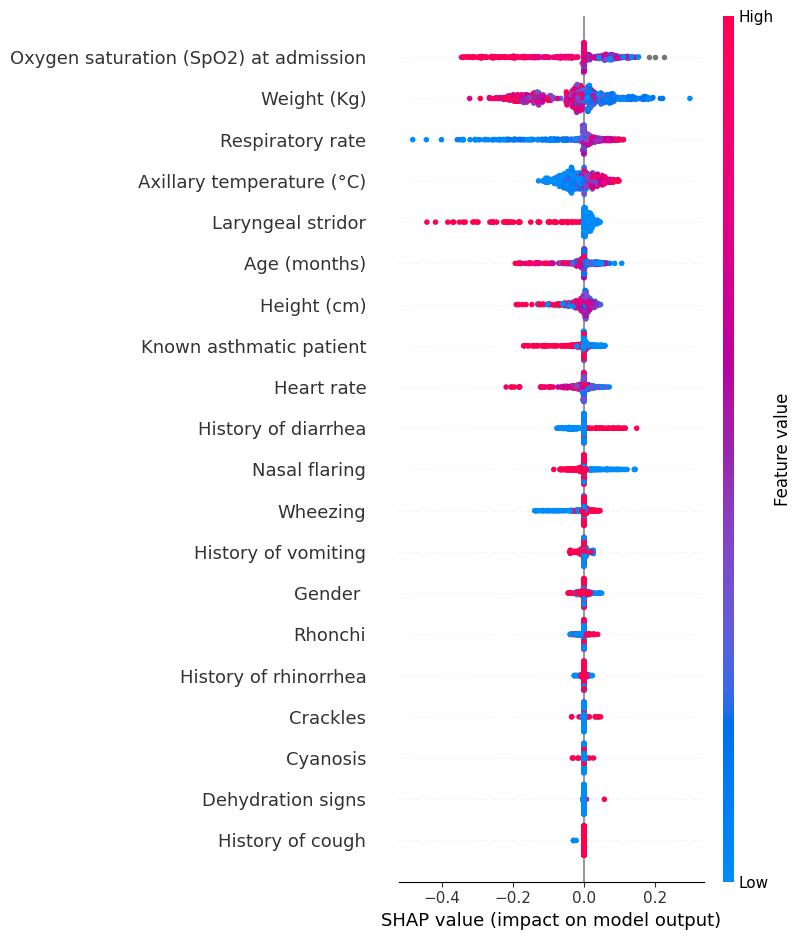


🎯 Mean Accuracy: 0.7097
🎯 Mean AUC: 0.7024


In [67]:
cat_features = ['Gender ', 'Known asthmatic patient', 'History of vomiting',
       'History of diarrhea', 'History of cough', 'History of rhinorrhea',
       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing','Dehydration signs',
       #'Confirmation of dehydration', 'Restlessness ',
                'Cyanosis',
       'Nasal flaring'
              #  'murmur'
      # 'Labored breathing'
              # ,   'Chest X-ray finding',
      # 'Pleural effusion'
                ]

# 5-fold StratifiedCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

shap_all = []  # SHAP値を蓄積
X_val_all = []  # 検証データを蓄積

acc_list = []
auc_list = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f'\n✅ Fold {fold + 1}')

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost用の Pool を作成
    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    val_pool = Pool(X_val, label=y_val, cat_features=cat_features)

    # モデル設定
    model = CatBoostClassifier(
        #iterations=200,
        #learning_rate=0.1,
        #depth=3,
        eval_metric='AUC',
        random_seed=42,
        class_weights=[1, 8],
        verbose=0
    )

    # 学習
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=20, verbose=False)

    # 予測
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)

    print(f'Accuracy: {acc:.4f} | AUC: {auc:.4f}')

    acc_list.append(acc)
    auc_list.append(auc)

    # SHAP値（n_samples, n_features + 1）→ 最後の列はbase値
    shap_values = model.get_feature_importance(val_pool, type="ShapValues")
    shap_all.append(shap_values[:, :-1])
    X_val_all.append(X_val)

# 4. SHAP summary plot（全foldを合体して可視化）
shap_all_concat = np.vstack(shap_all)
X_val_concat = pd.concat(X_val_all, axis=0)

shap.summary_plot(shap_all_concat, X_val_concat, show=False)
plt.savefig('SHAP.png',format="png", dpi=900)
plt.show()


# 平均表示
print(f'\n🎯 Mean Accuracy: {np.mean(acc_list):.4f}')
print(f'🎯 Mean AUC: {np.mean(auc_list):.4f}')


# Feature selection

In [19]:
common = ['Weight (Kg)','Respiratory rate','Oxygen saturation (SpO2) at admission']


✅ Fold 1

✅ Fold 2

✅ Fold 3

✅ Fold 4

✅ Fold 5


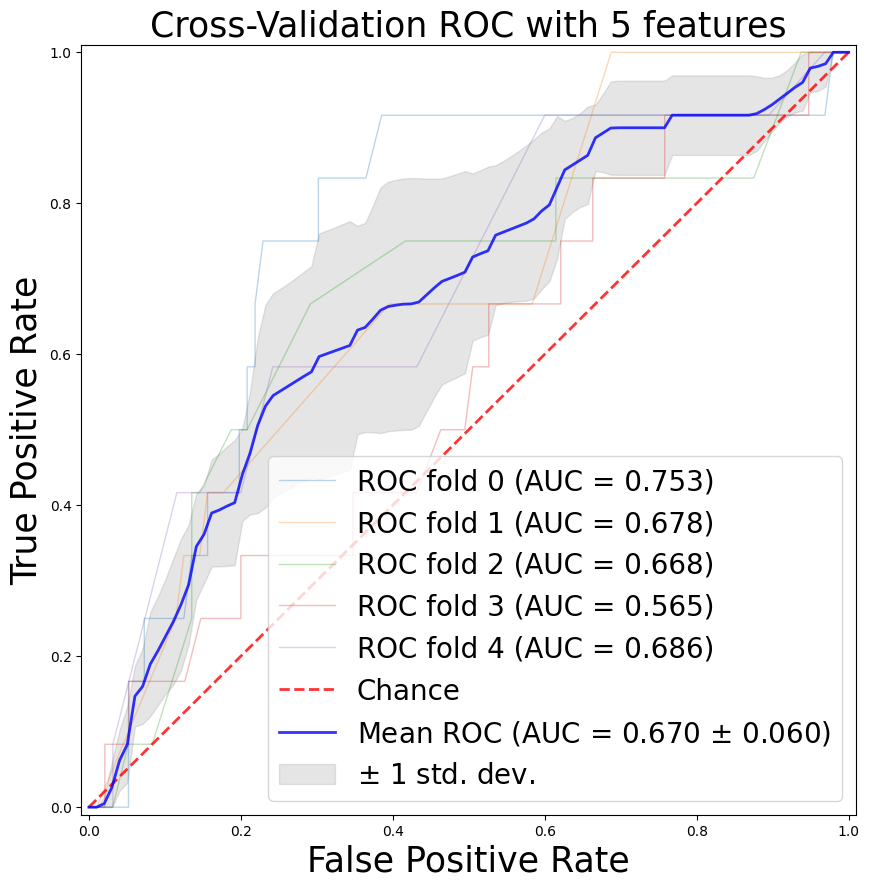

In [20]:
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

for fold, (train_idx, val_idx) in enumerate(skf.split(X[common], y)):
    print(f'\n✅ Fold {fold + 1}')

    X_train, X_val = X[common].iloc[train_idx], X[common].iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost用の Pool を作成
    train_pool = Pool(X_train, label=y_train
                      #, cat_features=['History of fever']
                      )
    val_pool = Pool(X_val, label=y_val
                    #, cat_features=['History of fever']
                    )

    # モデル設定
    model = CatBoostClassifier(
        #iterations=200,
        #learning_rate=0.1,
        #depth=3,
        eval_metric='AUC',
        random_seed=42,
        class_weights=[1, 8],
        verbose=0
    )

    # 学習
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=20, verbose=False)

    # 予測
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

# for train, test in cv.split(X2, y):
#     probas_ = classifier.fit(X2.iloc[train], y[train]).predict_proba(X2.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('Cross-Validation ROC with 5 features',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('5feat.png',format="png", dpi=900)

plt.show()

# Dependence plot

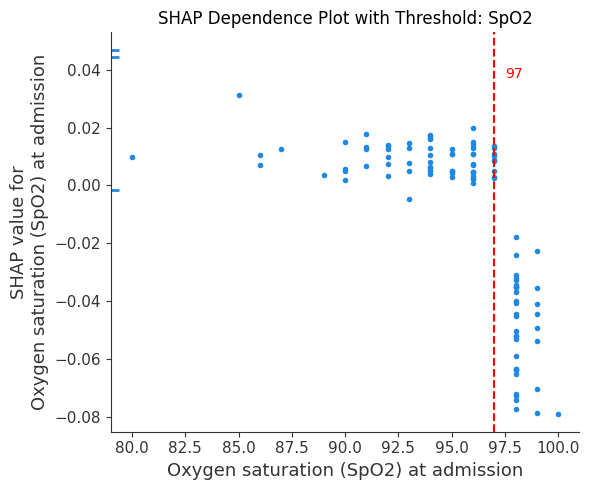

In [24]:
import shap
import matplotlib.pyplot as plt

# SHAPのdependenceプロット
shap_values_features = shap_values[:, :-1]
feature_name = 'Oxygen saturation (SpO2) at admission'
feature = 'SpO2'
shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=None
)

# 閾値を表示
threshold = 97
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.text(threshold + 0.5, plt.ylim()[1]*0.7, f"{threshold}", color='red')
plt.title(f"SHAP Dependence Plot with Threshold: {feature}")
#plt.legend()
plt.tight_layout()

plt.savefig('SpO2.png',format="png", dpi=900)
plt.show()

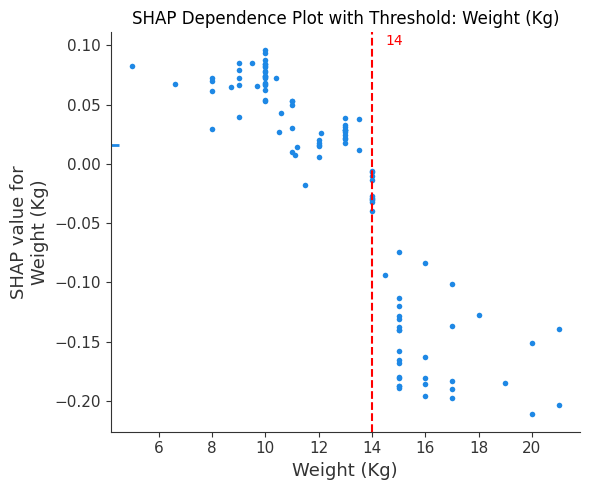

In [28]:
# SHAPのdependenceプロット
feature = 'Weight (Kg)'
feature_name = 'Weight (Kg)'
shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=None
)

# 閾値を表示
threshold = 14
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.text(threshold + 0.5, plt.ylim()[1]*0.9, f"{threshold}", color='red')
plt.title(f"SHAP Dependence Plot with Threshold: {feature}")
#plt.legend()
plt.tight_layout()
plt.savefig('BW.png',format="png", dpi=900)
plt.show()

In [29]:
X.columns

Index(['Age (months)', 'Gender ', 'Known asthmatic patient',
       'History of vomiting', 'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',
       'Oxygen saturation (SpO2) at admission', 'Axillary temperature (°C)',
       'Respiratory rate', 'Heart rate', 'Laryngeal stridor', 'Rhonchi',
       'Crackles', 'Wheezing', 'Dehydration signs', 'Cyanosis',
       'Nasal flaring'],
      dtype='object')

In [31]:
from sklearn.tree import DecisionTreeRegressor
X= X_val['Weight (Kg)'].values.reshape(-1, 1)
SHAP = shap_values[:, 7]

# ソートしておく（dependence plotと同じ）
sorted_idx = np.argsort(X.ravel())
X_sorted = X[sorted_idx].reshape(-1, 1)
SHAP_sorted = SHAP[sorted_idx]

# 決定木で分割点を1つだけ学習（depth=1）
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_sorted, SHAP_sorted)

# しきい値（＝木の分割点）を取得
threshold = tree.tree_.threshold[0]
print(f"🩸 自動抽出された体重のしきい値: {threshold:.4f} kg")

🩸 自動抽出された体重のしきい値: 14.2500 kg


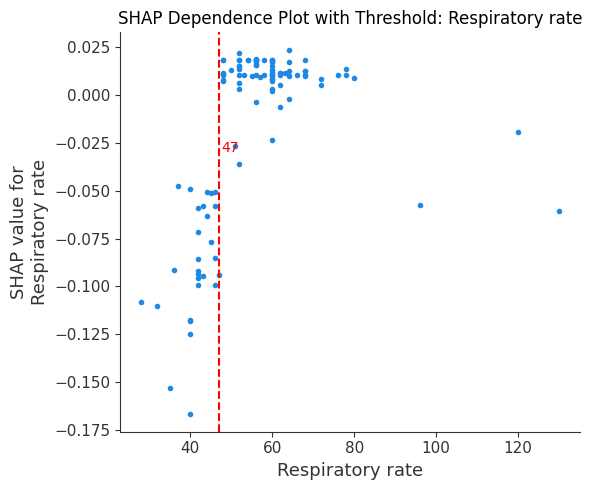

In [34]:
# SHAPのdependenceプロット
feature_name = 'Respiratory rate'
feature = 'Respiratory rate'
shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=None
)

# 閾値を表示
threshold = 47
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.text(threshold + 0.5, plt.ylim()[1]*-0.9, f"{threshold}", color='red')
plt.title(f"SHAP Dependence Plot with Threshold: {feature}")
#plt.legend()
plt.tight_layout()

plt.savefig('RR.png',format="png", dpi=900)
plt.show()

In [35]:
X= X_val['Respiratory rate'].values.reshape(-1, 1)
SHAP = shap_values[:, 11]

# ソートしておく（dependence plotと同じ）
sorted_idx = np.argsort(X.ravel())
X_sorted = X[sorted_idx].reshape(-1, 1)
SHAP_sorted = SHAP[sorted_idx]

# 決定木で分割点を1つだけ学習（depth=1）
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_sorted, SHAP_sorted)

# しきい値（＝木の分割点）を取得
threshold = tree.tree_.threshold[0]
print(f"🩸 自動抽出された呼吸数のしきい値: {threshold:.4f} /min")

🩸 自動抽出された呼吸数のしきい値: 47.5000 /min


# RS score (1yr>)

In [37]:
DF2 = DF1.copy()
DF2 = DF2.dropna(subset=['Respiratory rate', 'Oxygen saturation (SaO2) at admission', 'Weight (Kg)'])
DF2['RSV'].value_counts()

,count
RSV,
0,459
1,56


In [54]:
DF2['Laryngeal stridor'].value_counts()

,count
Laryngeal stridor,
No,449
Yes,66


In [38]:
def calculate_score(row):
  score = 0

  if row['Oxygen saturation (SaO2) at admission'] <= 97:
      score += 1

  if row['Weight (Kg)'] <= 14:
      score += 1

  # Respiratory rate
  if row['Respiratory rate'] >= 47:
      score += 1

  return score

# DF1にスコア列を追加
# DF1は前述のコードで定義されていると仮定
DF2['Score'] = DF2.apply(calculate_score, axis=1)

# スコア分布を確認
print(DF2['Score'].value_counts().sort_index())

# スコアとRSV陽性の関係を確認
print(DF2.groupby('Score')['RSV'].value_counts(normalize=True).unstack().fillna(0))


Score
0     26
1    104
2    197
3    188
Name: count, dtype: int64
RSV           0         1
Score                    
0      1.000000  0.000000
1      0.951923  0.048077
2      0.934010  0.065990
3      0.797872  0.202128


スコアリングが2点以上のときの感度: 0.9107
スコアリングが2点以上のときの特異度: 0.2723


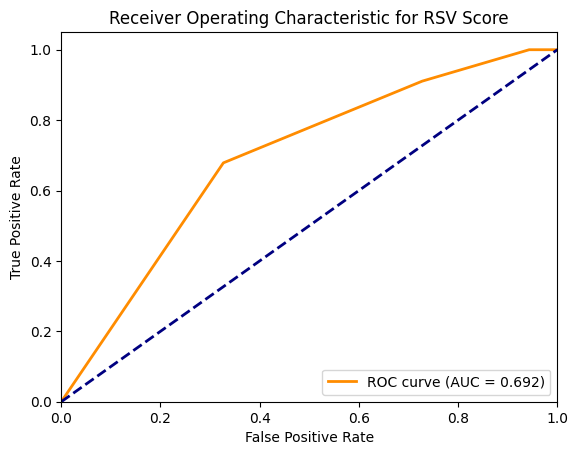

In [49]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# スコアが1点以上の患者を特定
y_pred_score_2plus = (DF2['Score'] >= 2).astype(int) # スコアが1点以上なら1、そうでなければ0
y_true = DF2['RSV']
# 混同行列を計算
cm_1plus = confusion_matrix(y_true, y_pred_score_2plus)

# 混同行列からTP, TN, FP, FNを取得
# cmは [[TN, FP], [FN, TP]] の形式
TN_1plus, FP_1plus, FN_1plus, TP_1plus = cm_1plus.ravel()

# 感度 (Recall or True Positive Rate) = TP / (TP + FN)
sensitivity_2plus = TP_1plus / (TP_1plus + FN_1plus) if (TP_1plus + FN_1plus) != 0 else 0

# 特異度 (Specificity or True Negative Rate) = TN / (TN + FP)
specificity_2plus = TN_1plus / (TN_1plus + FP_1plus) if (TN_1plus + FP_1plus) != 0 else 0

print(f"スコアリングが2点以上のときの感度: {sensitivity_2plus:.4f}")
print(f"スコアリングが2点以上のときの特異度: {specificity_2plus:.4f}")

# スコアが1点以上のときのROCカーブとAUC
fpr_1plus, tpr_1plus, thresholds_1plus = roc_curve(y_true, DF2['Score']) # スコア自体を確率のように扱う
roc_auc_1plus = auc(fpr_1plus, tpr_1plus)

plt.figure()
plt.plot(fpr_1plus, tpr_1plus, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc_1plus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RSV Score')
plt.legend(loc="lower right")
plt.savefig('RSVscore.png',format="png", dpi=900)
plt.show()


Score
0      2
1     39
2    122
3    180
4    172
Name: count, dtype: int64
RSV           0         1
Score                    
0      1.000000  0.000000
1      1.000000  0.000000
2      0.950820  0.049180
3      0.933333  0.066667
4      0.779070  0.220930
スコアリングが3点以上のときの感度: 0.8929
スコアリングが3点以上のときの特異度: 0.3420


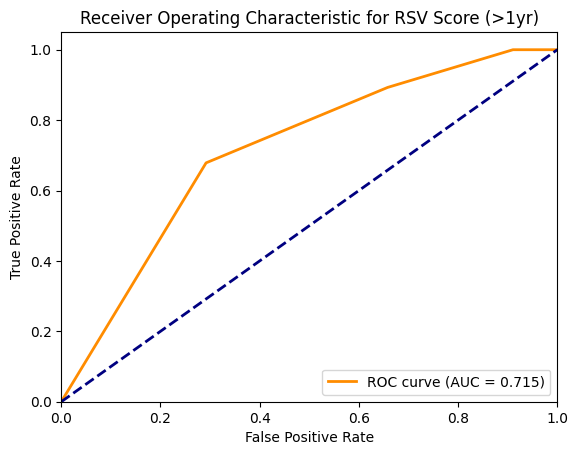

In [70]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def calculate_score(row):
  score = 0

  # Stridorが「なし」の場合に1点追加
  if row['Laryngeal stridor'] == 'No': # Label Encodingされていると仮定して、0が「なし」に対応
      score += 1

  if row['Oxygen saturation (SaO2) at admission'] <= 97:
      score += 1

  if row['Weight (Kg)'] <= 14:
      score += 1

  # Respiratory rate
  if row['Respiratory rate'] >= 47:
      score += 1

  return score

# DF1にスコア列を追加
# DF1は前述のコードで定義されていると仮定
DF2['Score'] = DF2.apply(calculate_score, axis=1)

# スコア分布を確認
print(DF2['Score'].value_counts().sort_index())

# スコアとRSV陽性の関係を確認
print(DF2.groupby('Score')['RSV'].value_counts(normalize=True).unstack().fillna(0))


# スコアが2点以上の患者を特定
y_pred_score_2plus = (DF2['Score'] >= 3).astype(int) # スコアが2点以上なら1、そうでなければ0
y_true = DF2['RSV']
# 混同行列を計算
cm_2plus = confusion_matrix(y_true, y_pred_score_2plus)

# 混同行列からTP, TN, FP, FNを取得
# cmは [[TN, FP], [FN, TP]] の形式
TN_2plus, FP_2plus, FN_2plus, TP_2plus = cm_2plus.ravel()

# 感度 (Recall or True Positive Rate) = TP / (TP + FN)
sensitivity_2plus = TP_2plus / (TP_2plus + FN_2plus) if (TP_2plus + FN_2plus) != 0 else 0

# 特異度 (Specificity or True Negative Rate) = TN / (TN + FP)
specificity_2plus = TN_2plus / (TN_2plus + FP_2plus) if (TN_2plus + FP_2plus) != 0 else 0

print(f"スコアリングが3点以上のときの感度: {sensitivity_2plus:.4f}")
print(f"スコアリングが3点以上のときの特異度: {specificity_2plus:.4f}")

# スコアが2点以上のときのROCカーブとAUC
fpr_2plus, tpr_2plus, thresholds_2plus = roc_curve(y_true, DF2['Score']) # スコア自体を確率のように扱う
roc_auc_2plus = auc(fpr_2plus, tpr_2plus)

plt.figure()
plt.plot(fpr_2plus, tpr_2plus, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc_2plus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RSV Score (>1yr)')
plt.legend(loc="lower right")
plt.savefig('RSVscore_in_1yr.png',format="png", dpi=900)
plt.show()

